In [1]:
import pandas as pd
import numpy as np
import torch
from models import MultiRBFnnTime, MultiRBFnn_sigma

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
def Dataset(date, missing, device):
    
    if missing == 'long':
        df = pd.read_csv('./dataset/ETh_{}_longterm.csv'.format(date)).drop(['date'], axis = 1)
    else:
        df = pd.read_csv('./dataset/df_{}20missing.csv'.format(date)).drop(['date'], axis = 1)
    df_ground = pd.read_csv('./dataset/ETh_{}.csv'.format(date)).drop(['date'], axis = 1)
    lossth = np.mean(df.mean().values) * 0.1

    input_data =  torch.tensor(np.array(df.index) + 1, device = device, dtype = torch.float64)
    target = torch.tensor(df.values.T.astype(np.float64), device = device, dtype = torch.float64)
    target_ground = torch.tensor(df_ground.values.T.astype(np.float64), device = device, dtype = torch.float64)
    

    return input_data, target, lossth, target_ground

In [4]:
input_data, target, lossth, target_ground = Dataset('year', 'long', device)

In [7]:
input_data, target2, lossth2, target_ground2 = Dataset('year', 'short', device)

In [8]:
train_masking = torch.where(target2.isnan(), 0.0 , 1.0)
real_masking = torch.where(target_ground2.isnan(), 0.0 , 1.0)
missing_index2 = real_masking - train_masking
torch.sum(missing_index2)

tensor(12049., device='cuda:0')

In [5]:
train_masking = torch.where(target.isnan(), 0.0 , 1.0)
real_masking = torch.where(target_ground.isnan(), 0.0 , 1.0)
missing_index = real_masking - train_masking
torch.sum(missing_index)

tensor(11936., device='cuda:0')

tensor(1708., device='cuda:0')


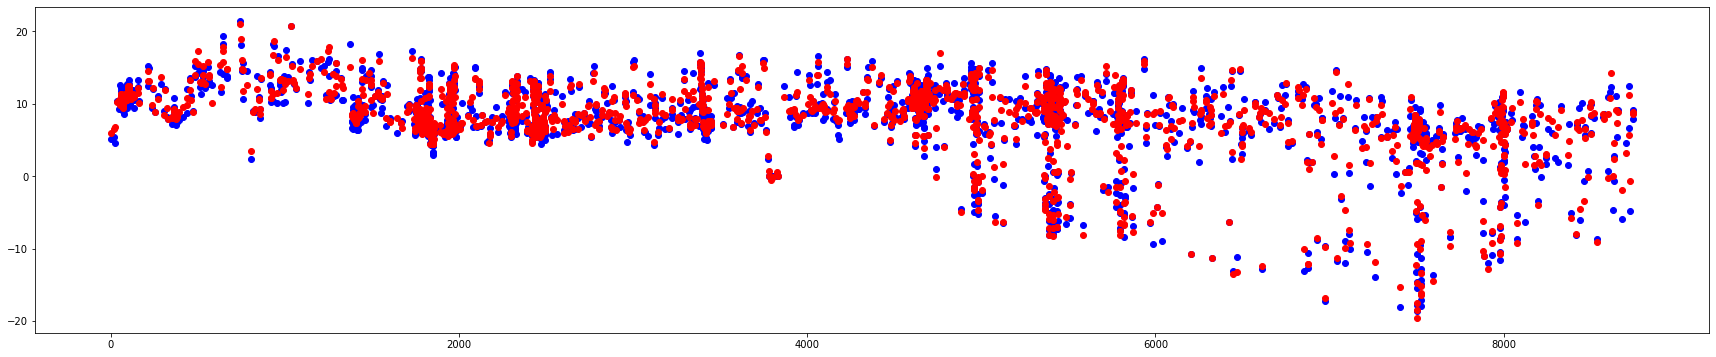

tensor(1750., device='cuda:0')


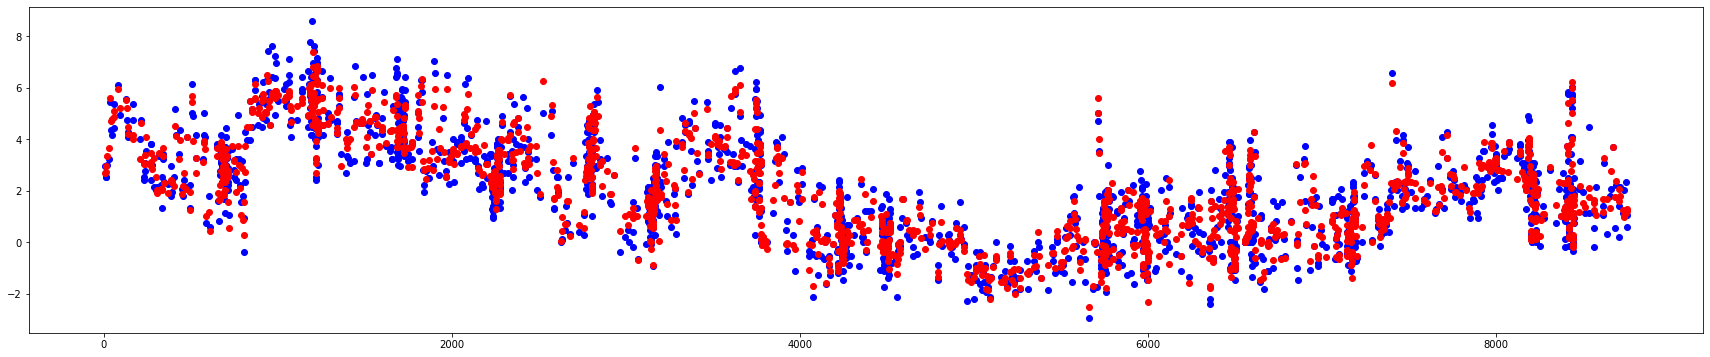

tensor(1677., device='cuda:0')


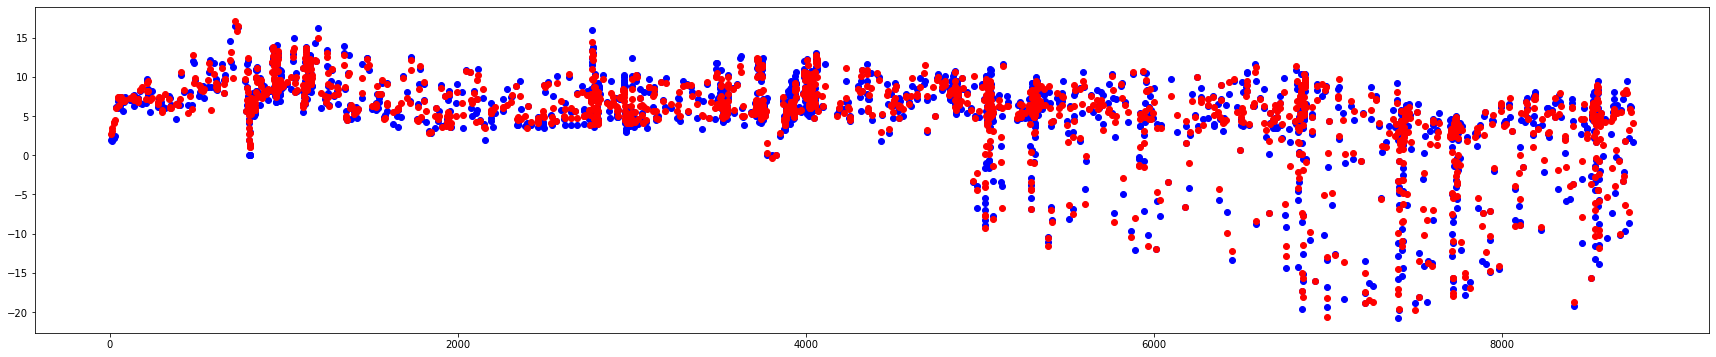

tensor(1657., device='cuda:0')


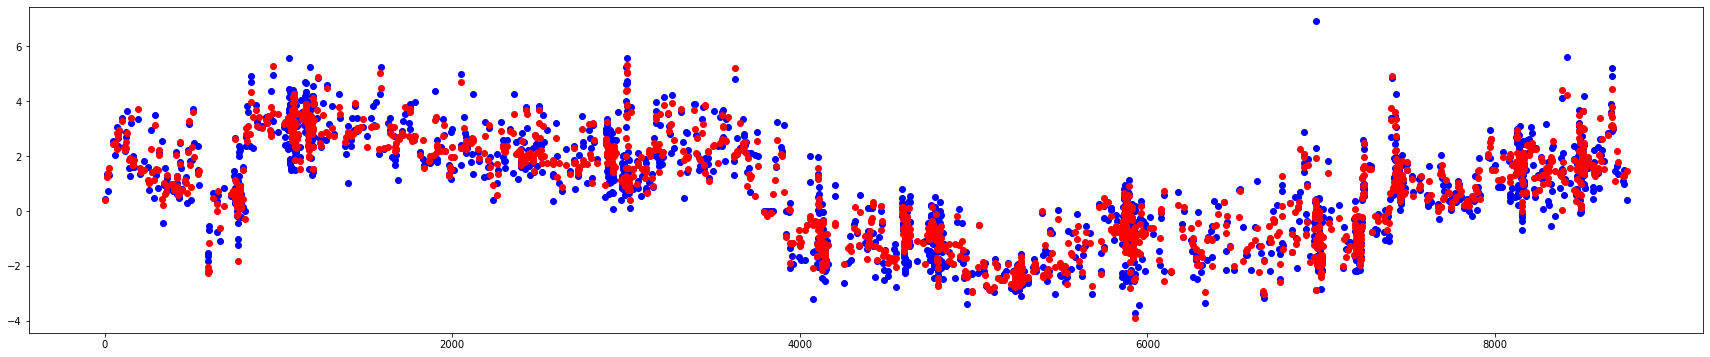

tensor(1701., device='cuda:0')


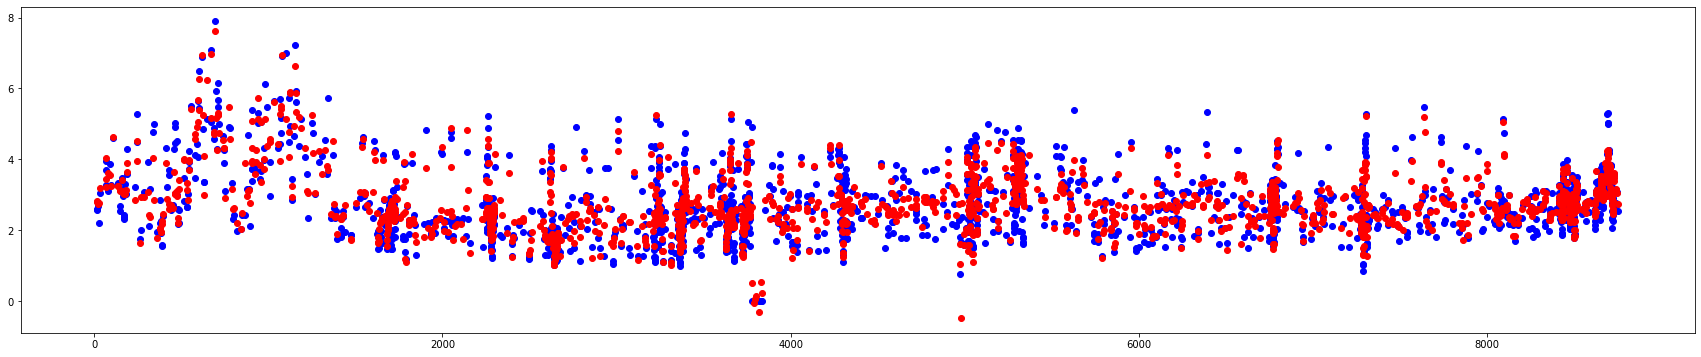

tensor(1672., device='cuda:0')


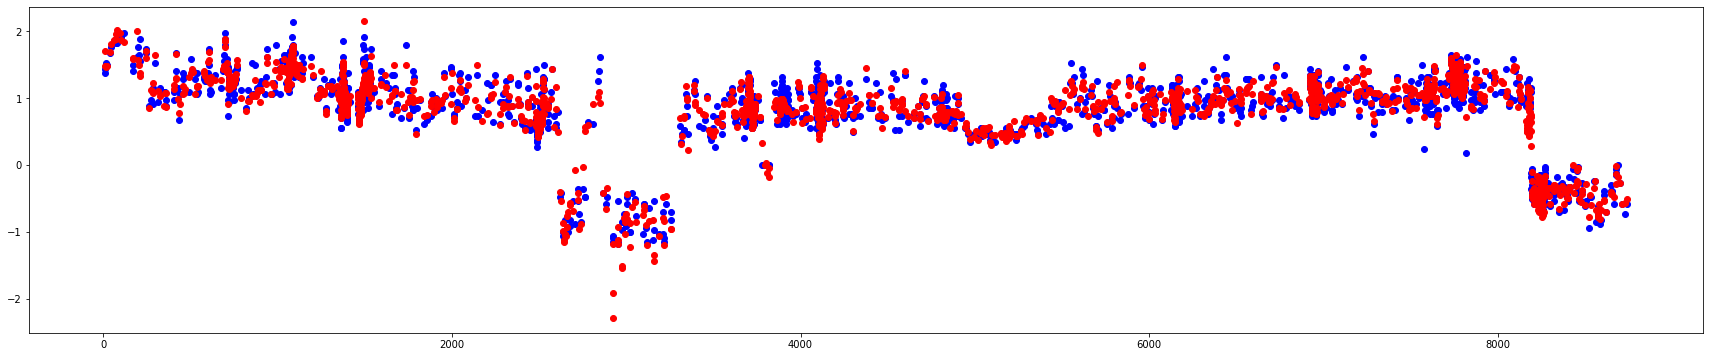

tensor(1771., device='cuda:0')


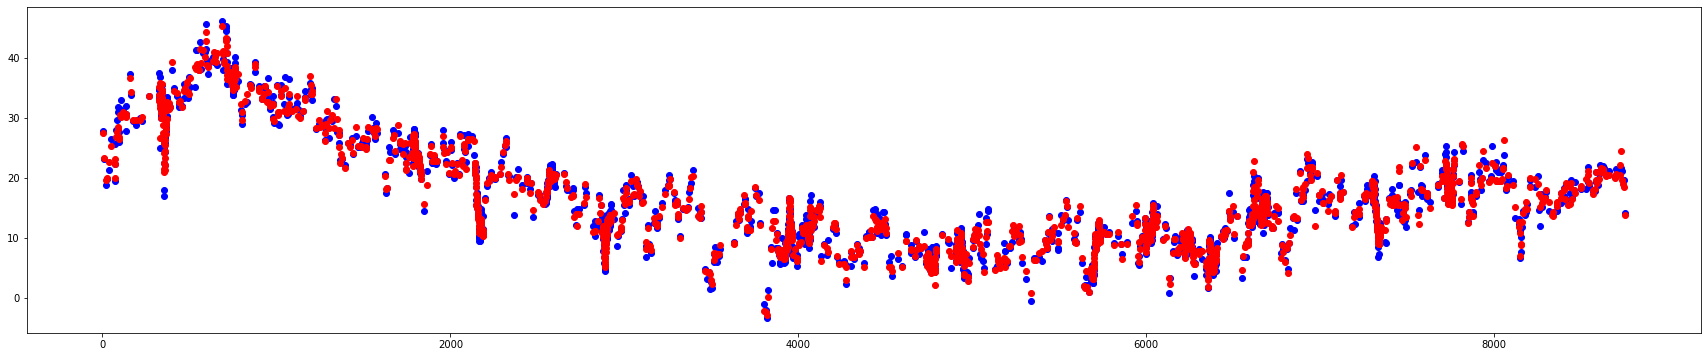

In [33]:
import matplotlib.pyplot as plt
model_year_randaom = torch.load('./RBFresult/year_rbf_random_20.pt')
pred = model_year_randaom.pred(input_data)[1]
for i in range(7):
    print(torch.sum(missing_index[i]))
    plt.figure(figsize=(30, 6))
    plt.scatter(input_data[missing_index[i] != 0].cpu().detach().numpy(), target_ground[i][missing_index[i] != 0].cpu().detach().numpy(), c = 'blue')
    plt.scatter(input_data[missing_index[i] != 0].cpu().detach().numpy(), pred[i][missing_index[i] != 0].cpu().detach().numpy(), c = 'red')
    plt.show()

tensor(1719., device='cuda:0')


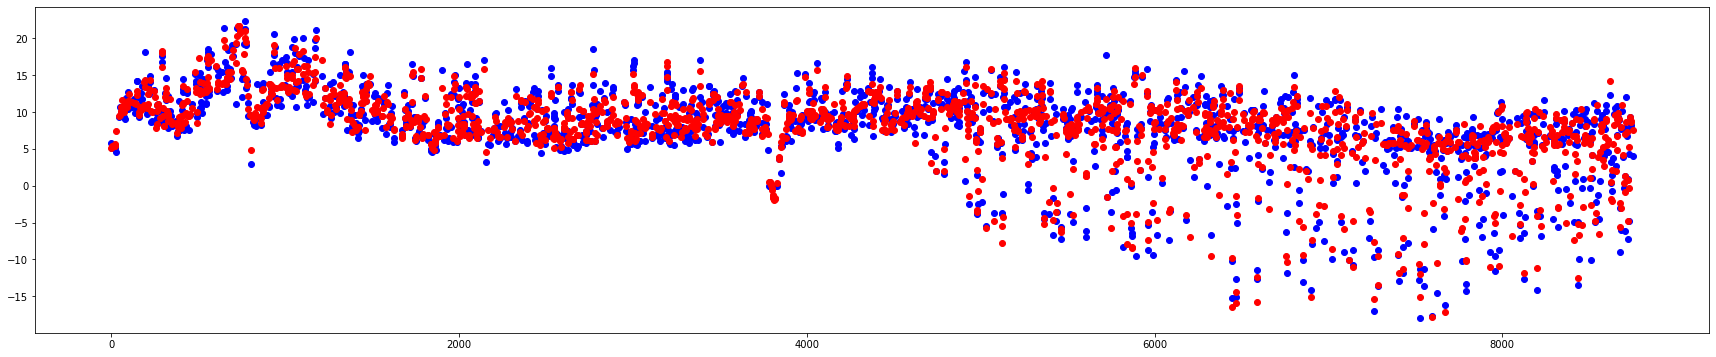

tensor(1825., device='cuda:0')


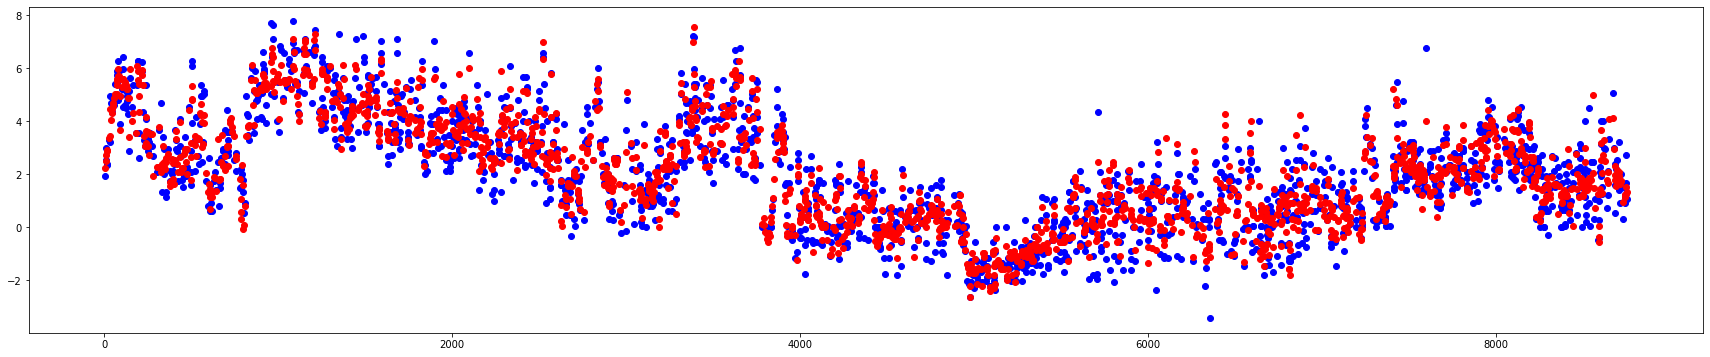

tensor(1648., device='cuda:0')


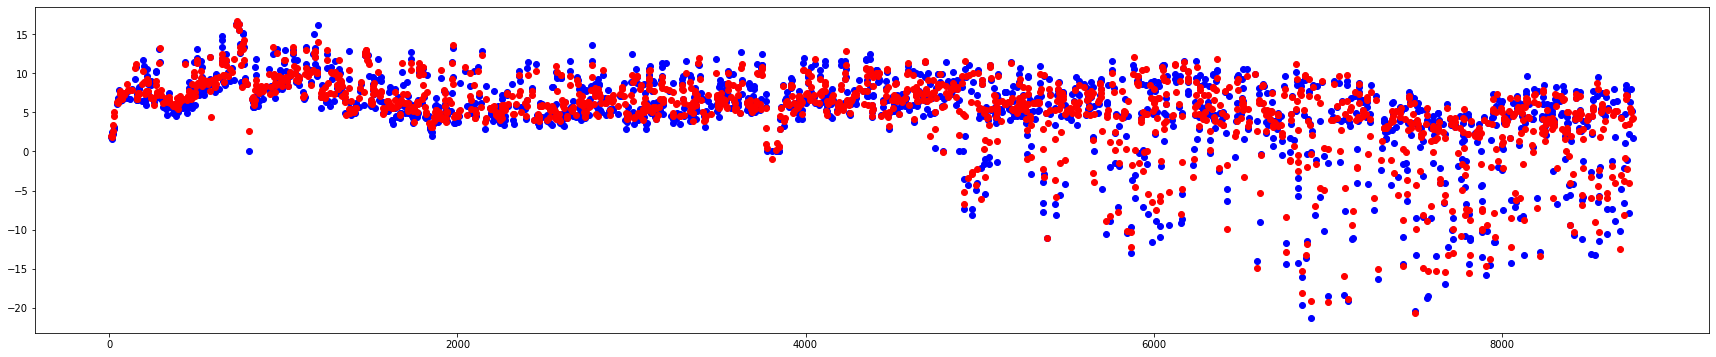

tensor(1722., device='cuda:0')


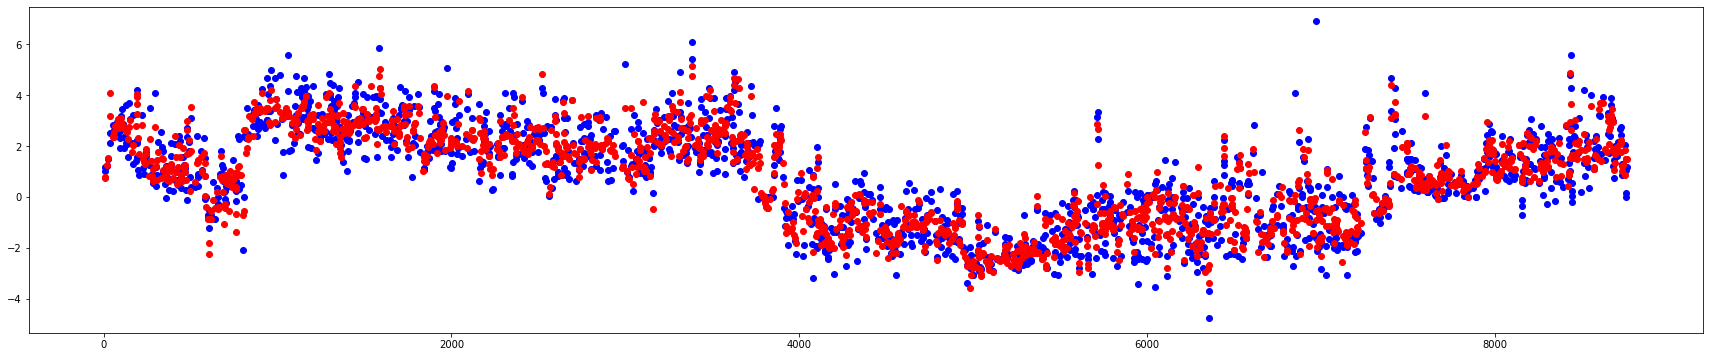

tensor(1737., device='cuda:0')


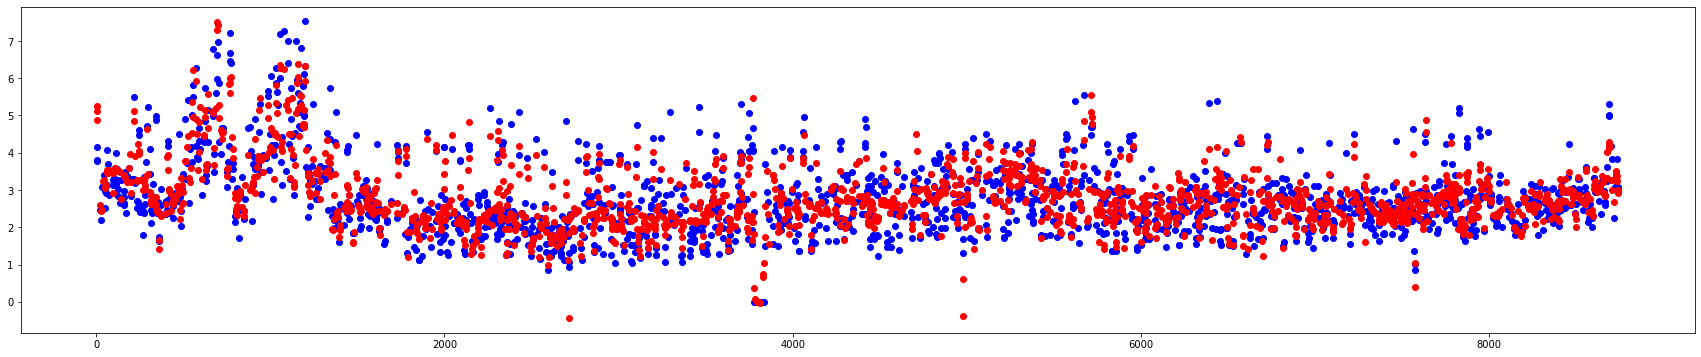

tensor(1714., device='cuda:0')


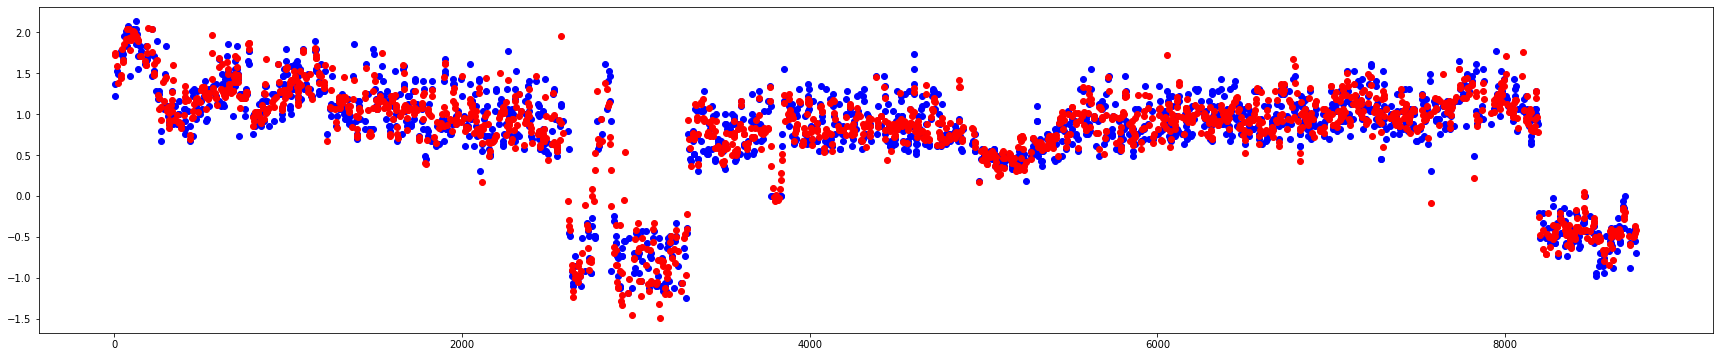

tensor(1684., device='cuda:0')


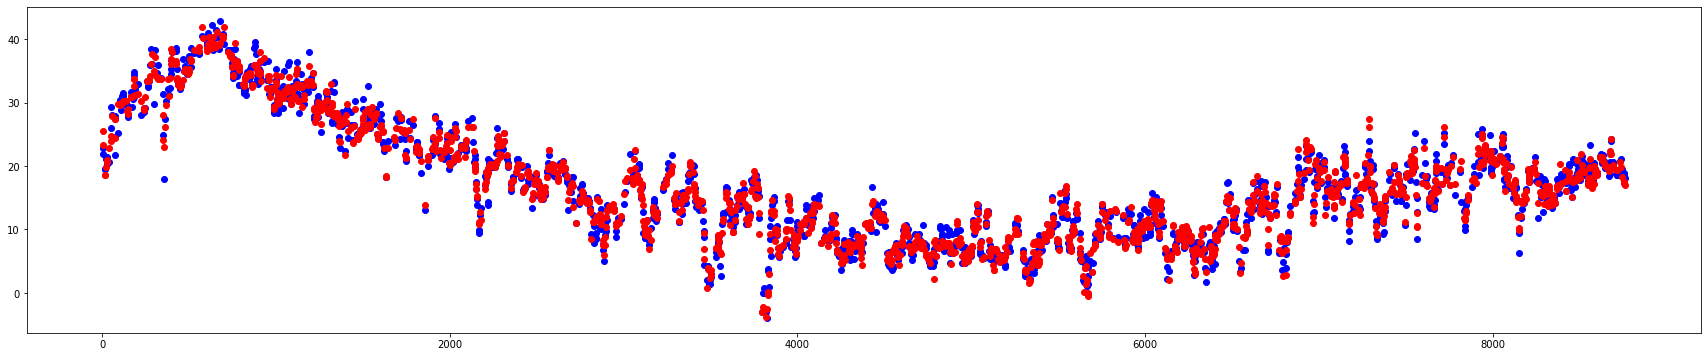

In [9]:
import matplotlib.pyplot as plt
model_year3 = torch.load('./RBFresultsigma/year_rbf_short_20.pt')
pred = model_year3.pred(input_data)[1]
for i in range(7):
    print(torch.sum(missing_index2[i]))
    plt.figure(figsize=(30, 6))
    plt.scatter(input_data[missing_index2[i] != 0].cpu().detach().numpy(), target_ground2[i][missing_index2[i] != 0].cpu().detach().numpy(), c = 'blue')
    plt.scatter(input_data[missing_index2[i] != 0].cpu().detach().numpy(), pred[i][missing_index2[i] != 0].cpu().detach().numpy(), c = 'red')
    plt.show()